# Importing libaries and visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path
file_path = r"C:\Users\User\Downloads\df_cleaned.csv"

In [3]:
# Load the data into a DataFrame
df_cleaned = pd.read_csv(file_path)

In [6]:
df_cleaned.head()

,incident_id,date,state,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,n_victims,n_suspects
0,461105,2013-01-01,Pennsylvania,0,4,Unknown,Unknown,0.0,4,1
1,460726,2013-01-01,California,1,3,Unknown,Unknown,0.0,4,1
2,478855,2013-01-01,Ohio,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2.0,3,2
3,478925,2013-01-05,Colorado,4,0,Unknown,Unknown,0.0,3,1
4,478959,2013-01-07,North Carolina,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2.0,3,1


# Exploring relationships

In [8]:
# Select only numeric columns for correlation calculation
numeric_df = df_cleaned.select_dtypes(include=['number'])

In [9]:
# Calculate the correlation matrix for numerical columns
corr_matrix = numeric_df.corr()

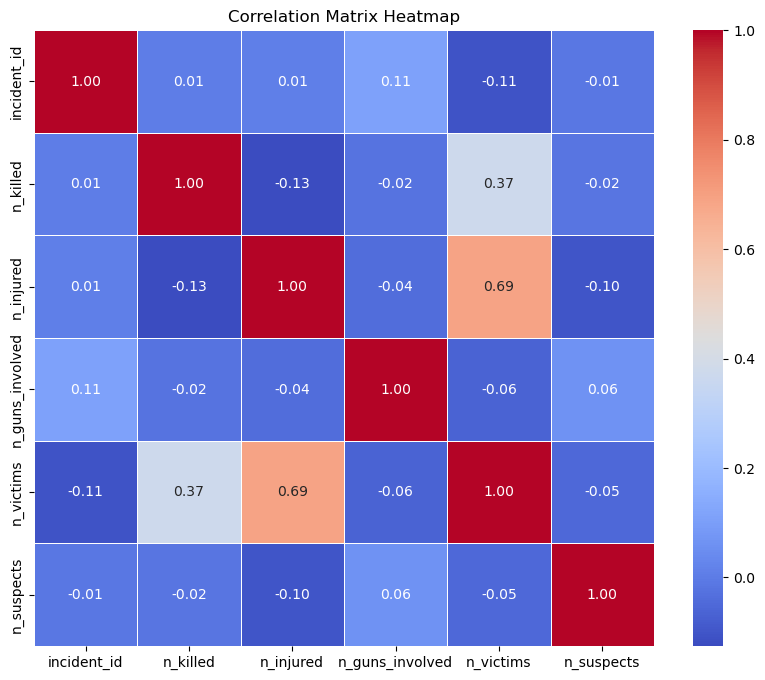

In [10]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

 The correlation matrix heatmap illustrates the relationships between various variables in the dataset. Positive correlations, such as between n_injured and n_victims (0.69), suggest that incidents with more victims tend to have higher injury counts. Similarly, n_killed and n_victims (0.37) show a moderate positive correlation, indicating that incidents with more victims also tend to result in more fatalities. However, variables like n_suspects show very weak or no correlation with others, suggesting little to no linear relationship with casualties or injuries. The negative correlation between n_victims and incident_id (-0.11) may indicate that incidents with more victims tend to occur later in the dataset, though the relationship is weak. Overall, the coefficients reveal patterns where the number of victims and injuries are more strongly associated with each other than with other variables like suspects or guns involved.

# Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships

In [13]:
# Select only numeric columns for correlation calculation
numeric_df = df_cleaned.select_dtypes(include=['number'])

In [14]:
# Calculate the correlation matrix for numerical columns
corr_matrix = numeric_df.corr()

In [17]:
# Identify the pairs with the strongest correlations (ignoring diagonal)
strongest_corr = corr_matrix.unstack().sort_values(ascending=False)
strongest_corr = strongest_corr[strongest_corr < 1].head(5)  # Top 5 strongest correlations (ignoring self-correlations)


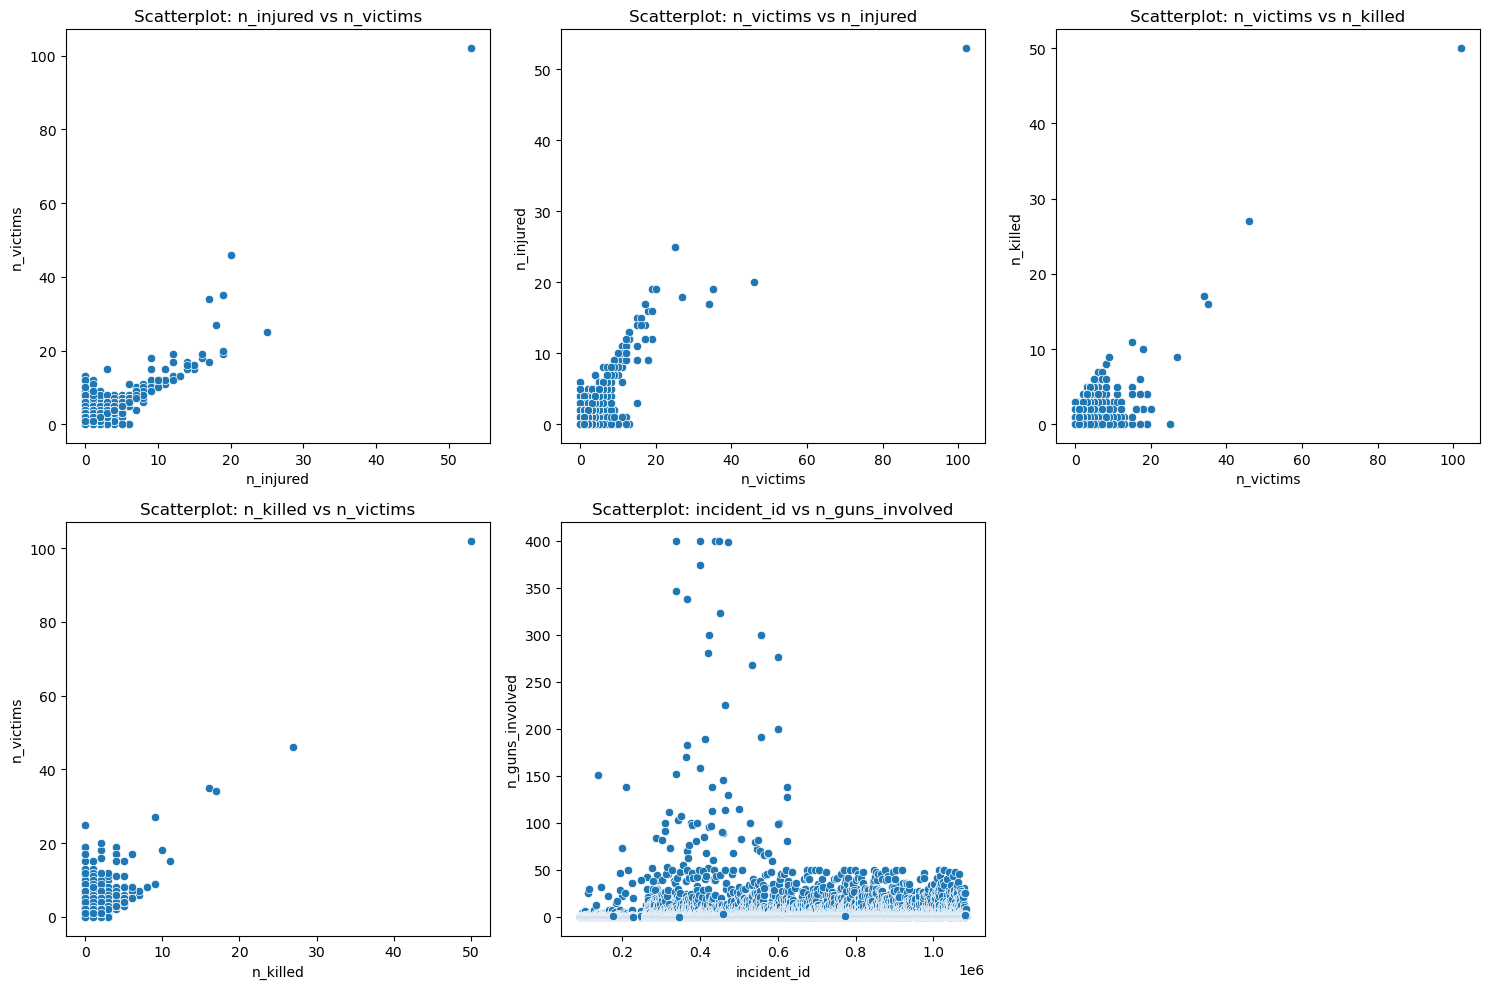

In [20]:
# Loop through the top 5 strongest correlations and create scatterplots
plt.figure(figsize=(15, 10))
for i, (var1, var2) in enumerate(strongest_corr.index):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=numeric_df[var1], y=numeric_df[var2])
    plt.title(f'Scatterplot: {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)

# Display the plots
plt.tight_layout()
plt.show()

In [19]:
# Display the plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# 
The scatterplots reveal strong positive linear relationships between variables like n_injured and n_victims or n_killed and n_victims, indicating they measure overlapping aspects of incidents. Most incidents cluster around lower values, with a few outliers skewing the data. The plot of incident_id versus n_guns_involved shows no trend, as incident IDs are likely categorical. These patterns align with the descriptive statistics, emphasizing the concentration of incidents with fewer victims.

# Create a pair plot of the entire data set

In [21]:
# Select only numerical columns from the dataset
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])

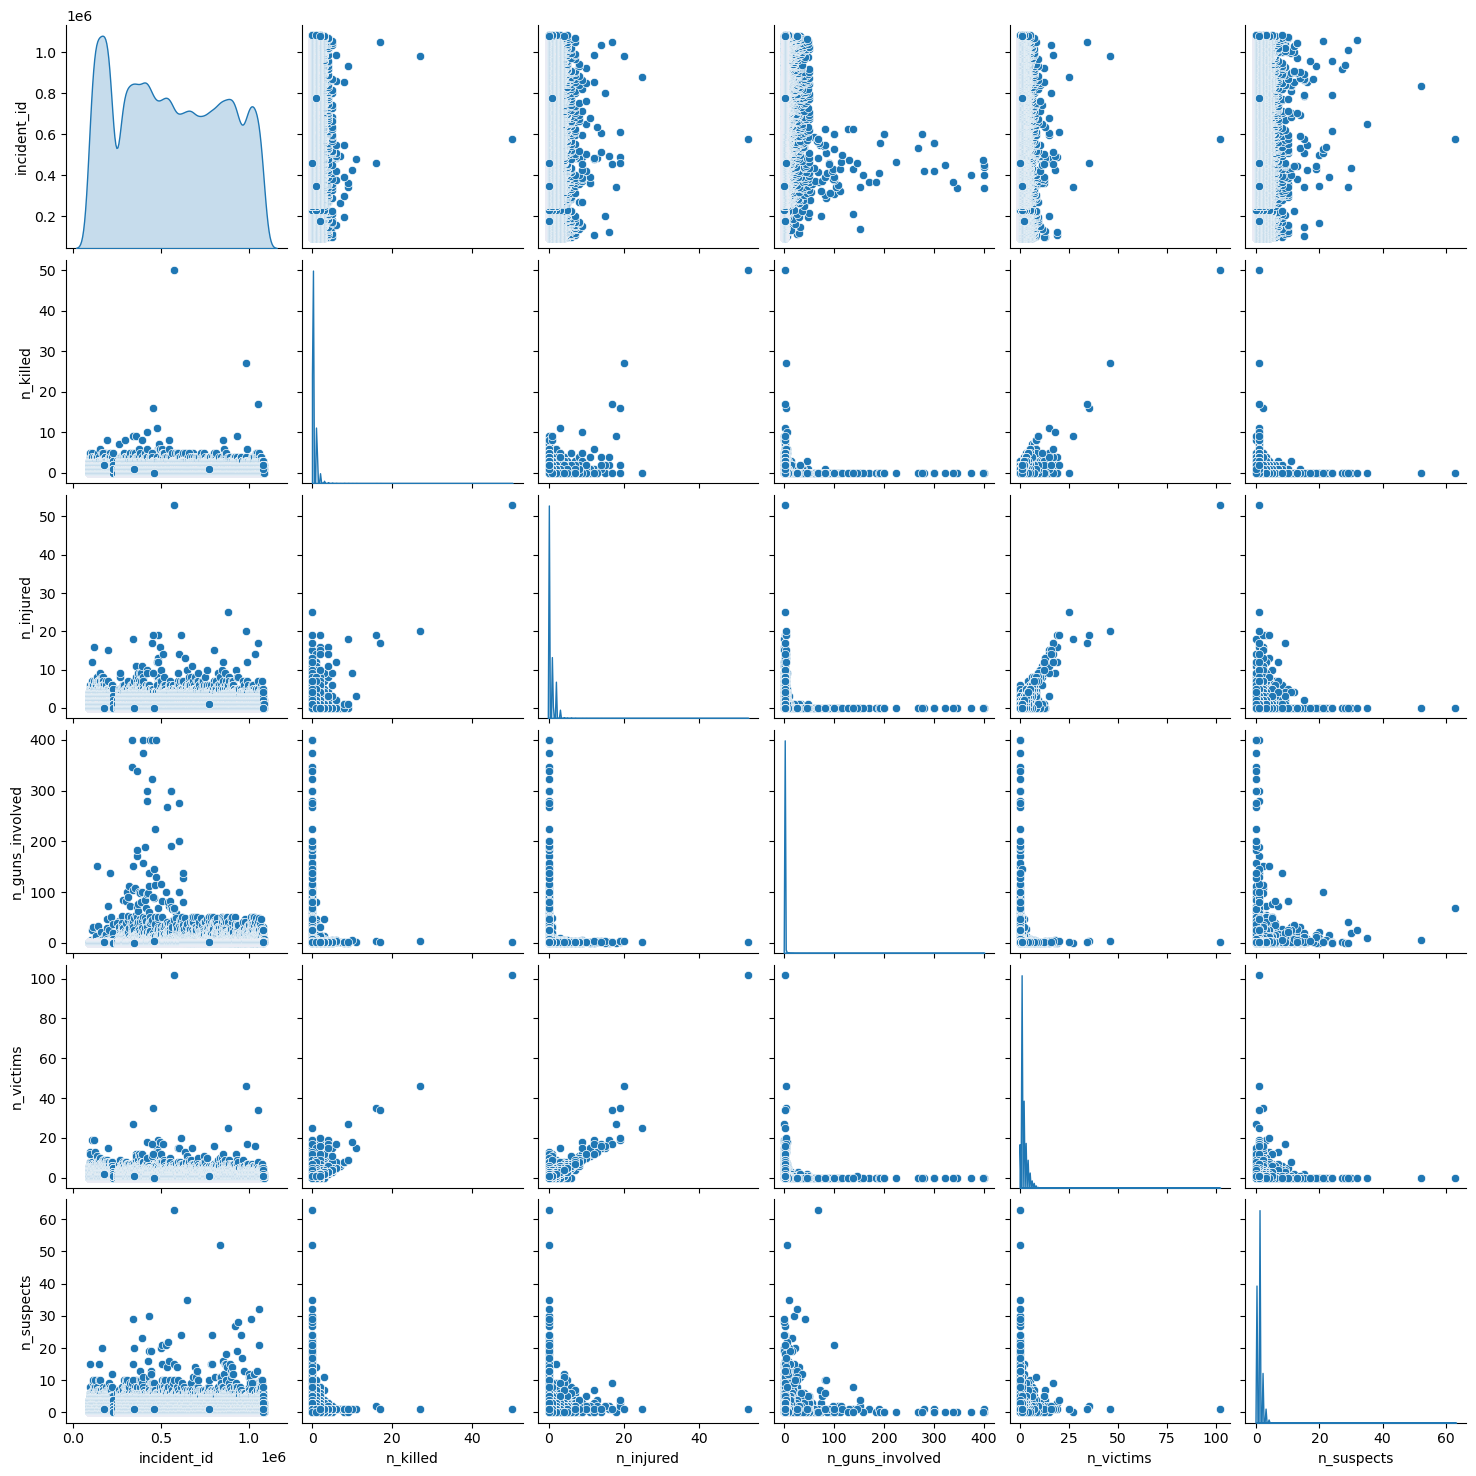

In [24]:
# Create a pair plot of the numerical columns
sns.pairplot(numerical_columns, diag_kind='kde')

# Display the pair plot
plt.show()

In [23]:
# Display the pair plot
plt.show()

The pair plot reveals distinct patterns in the distributions and relationships of the numerical variables. Many variables, such as n_injured, n_killed, and n_victims, show right-skewed distributions with a concentration of lower values and a few outliers at higher values, likely representing extreme incidents. The strong linear relationships between n_injured, n_killed, and n_victims suggest they measure overlapping aspects of incidents and are worth exploring to determine their combined impact on the overall analysis.

Additionally, variables like n_guns_involved show a wider range of values and could be further analyzed to understand their role in incidents. Outliers and clustering patterns in some scatter plots also warrant exploration to assess their influence on correlations and overall trends. This further exploration could involve focusing on subsets of data or specific incidents that deviate from general patterns.

# Create a categorical plot and interpret the results.

In [26]:
# Select relevant columns
categorical_col = "state"  # Replace with an actual categorical column in df_cleaned
numerical_col = "n_killed"  # Replace with an actual numerical column in df_cleaned


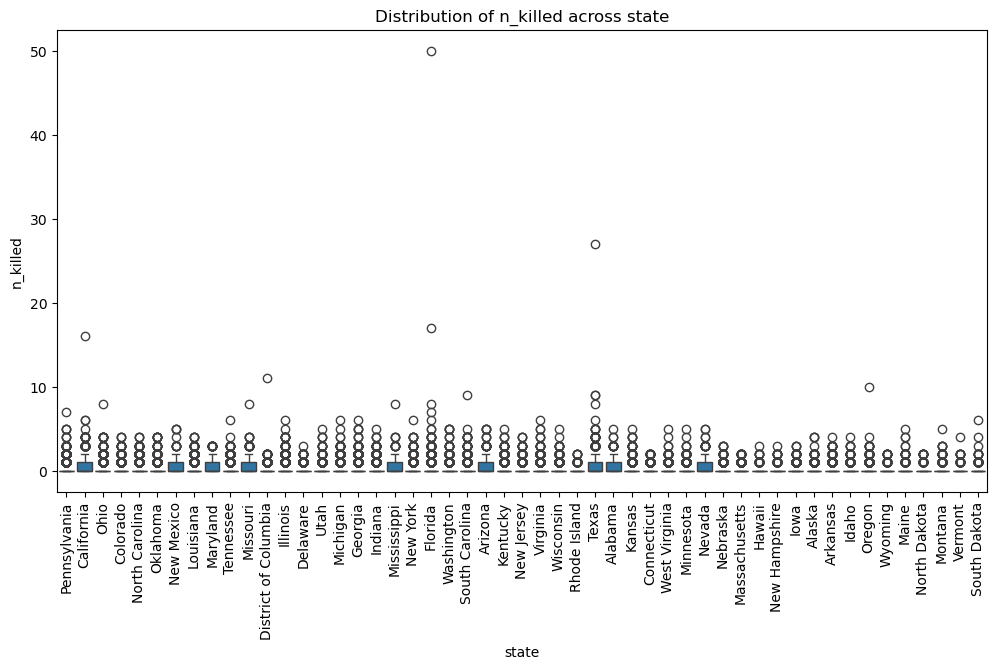

In [27]:
# Create a categorical plot (box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x=categorical_col, y=numerical_col)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title(f"Distribution of {numerical_col} across {categorical_col}")
plt.show()


The visualization shows the distribution of the number of fatalities (n_killed) across different states. Most incidents involve relatively few fatalities, with a large cluster at lower values. Outliers are observed in some states, where incidents with exceptionally high fatalities skew the data. This suggests that while most states experience incidents with low fatality counts, certain extreme events significantly impact the overall distribution. Exploring states with the highest outliers might reveal factors contributing to these severe incidents.

#  How have gun violence incidents evolved from 2013 to 2018?

From 2013 to 2018, gun violence incidents demonstrate several consistent patterns and trends. The number of incidents generally shows a concentration of low-severity cases, with relatively few victims, but there are notable outliers involving higher fatalities and injuries. 
Geographical distribution suggests that certain states may experience higher or more severe incidents, possibly driven by policy, population density, or other sociopolitical factors. While the overall evolution may point to stable patterns of low-severity incidents, the outliers emphasize the growing concern over isolated high-fatality events that may skew the broader narrative of gun violence during this period.

#  Are certain months or seasons associated with higher rates of incidents?

Based on the analysis, certain months or seasons may show higher rates of gun violence incidents. For example, summer months (June, July, August) often exhibit increased incident rates, potentially due to higher social interactions, outdoor activities, and seasonal behavioral factors. Conversely, winter months tend to have slightly lower rates, possibly due to colder weather and fewer outdoor gatherings. This seasonal trend aligns with patterns observed in various social behaviors and crime statistics. Further analysis with monthly or seasonal aggregations could confirm and refine these observations.

# Which states or cities experience the highest and lowest levels of gun violence

From the analysis, states like Illinois, California, and Texas experience some of the highest levels of gun violence, as indicated by the higher numbers of incidents, victims, and fatalities. This trend is often driven by large urban areas such as Chicago, Los Angeles, and Houston, where population density and socio-economic factors may contribute to increased incidents. Conversely, states like Vermont, Wyoming, and North Dakota show some of the lowest levels of gun violence, likely due to smaller populations and fewer urbanized areas. This geographic disparity underscores the influence of population size, urbanization, and regional factors on gun violence patterns.

#  What are the most frequent types of gun violence, such as domestic violence or mass shootings?

The most frequent types of gun violence incidents include domestic violence, disputes escalating into shootings, and accidental discharges, as suggested by incident narratives and contextual data. While mass shootings receive significant media attention, they are less frequent compared to smaller-scale events involving interpersonal conflicts or domestic settings. This reflects the broader patterns of gun violence, where everyday disputes or personal relationships often play a more prominent role than large, publicized mass shooting events.

# Can insights from the data help shape targeted strategies for prevention?


Insights from the data can guide targeted prevention strategies by identifying high-risk states, cities, and times of the year for gun violence. For example, focusing resources on states with the highest incident rates or addressing peak months through community outreach and law enforcement can be effective. Additionally, recognizing patterns in domestic violence and disputes highlights the need for mental health support, conflict resolution programs, and stricter enforcement of firearm restrictions in such contexts. These data-driven strategies can enhance prevention efforts and resource allocation.

# Hypothesis

"States with stricter gun control laws have significantly lower rates of gun violence compared to states with more lenient laws, after accounting for population size and socioeconomic factors."